<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Nastya/lenet/ReschOfOptimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model



<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>padding</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>2</th>
    <th>convoluation</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>4</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>5</th>
    <th>maximum pooling</th>
    <th>6</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>6</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>7</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>8</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>9</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>10</th>
    <th>maximum pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>11</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>12</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>35</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

# Hyperparameters

train dataset: MNIST + EMNIST letters

test dataset: dataset of DreamTeam

training sample size: 36960 * 2

validation sample size: 30800

testing sample size: 16784

loss finction: Cross Entropy Loss

optimizers:
SGD,
Adam,
Adagrad,
RMSprop,
Rprop

learning rate:  0.005, 0.001, 0.0005, 0.0001

batch size: 2640


#Module importation

In [1]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar
import pickle
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

#Git cloning

In [2]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36553, done.
remote: Counting objects: 100% (12913/12913), done.
remote: Compressing objects: 100% (12743/12743), done.
remote: Total 36553 (delta 225), reused 12805 (delta 160), pack-reused 23640
Receiving objects: 100% (36553/36553), 129.96 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (510/510), done.


#Dataset preparation

In [3]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:08<00:00, 68645750.41it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


In [4]:
class Lenet1(torch.nn.Module):
  def __init__(self, dp_rate):
    super(Lenet1, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
    self.bn1 = torch.nn.BatchNorm2d(4)
    self.act1 = torch.nn.ReLU6()
    self.dropout1 = torch.nn.Dropout(p=dp_rate)
    self.conv2 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.bn2 = torch.nn.BatchNorm2d(4)
    self.act2 = torch.nn.ReLU6()
    self.dropout2 = torch.nn.Dropout(p=dp_rate)
    self.conv3 = torch.nn.Conv2d(in_channels=4, out_channels=6, kernel_size=3, padding=1)
    self.bn3 = torch.nn.BatchNorm2d(6)
    self.act3 = torch.nn.ReLU6()
    self.dropout3 = torch.nn.Dropout(p=dp_rate)
    self.conv4 = torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1)
    self.bn4 = torch.nn.BatchNorm2d(6)
    self.act4 = torch.nn.ReLU6()
    self.dropout4 = torch.nn.Dropout(p=dp_rate)
    self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU6()
    self.conv5 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=0)
    self.bn5 = torch.nn.BatchNorm2d(12)
    self.act6 = torch.nn.ReLU6()
    self.dropout5 = torch.nn.Dropout(p=dp_rate)
    self.conv6 = torch.nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1)
    self.bn6 = torch.nn.BatchNorm2d(12)
    self.act7 = torch.nn.ReLU6()
    self.dropout6 = torch.nn.Dropout(p=dp_rate)
    self.conv7 = torch.nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, padding=0)
    self.bn7 = torch.nn.BatchNorm2d(16)
    self.act8 = torch.nn.ReLU6()
    self.dropout7 = torch.nn.Dropout(p=dp_rate)
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.bn8 = torch.nn.BatchNorm2d(16)
    self.act9 = torch.nn.ReLU6()
    self.dropout8 = torch.nn.Dropout(p=dp_rate)
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU6()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU6()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU6()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.act1(x)
    x = self.dropout1(x)
    skipConn1 = x

    x = self.conv2(x)
    x = self.bn2(x)
    x = self.act2(x)
    x = self.dropout2(x)
    x = torch.add(skipConn1, x)

    x = self.conv3(x)
    x = self.bn3(x)
    x = self.act3(x)
    x = self.dropout3(x)
    skipConn2 = x

    x = self.conv4(x)
    x = self.bn4(x)
    x = self.act4(x)
    x = self.dropout4(x)
    x = torch.add(skipConn2, x)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.bn5(x)
    x = self.act6(x)
    x = self.dropout5(x)
    skipConn3 = x

    x = self.conv6(x)
    x = self.bn6(x)
    x = self.act7(x)
    x = self.dropout6(x)
    x = torch.add(x, skipConn3)

    x = self.conv7(x)
    x = self.bn7(x)
    x = self.act8(x)
    x = self.dropout7(x)
    skipConn4 = x

    x = self.conv8(x)
    x = self.bn8(x)
    x = self.act9(x)
    x = self.dropout8(x)
    x = torch.add(skipConn4, x)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

#SGD

## lr = 0,005

In [15]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.SGD(lenet.parameters(), lr=0.005)
test_accuracy_history = []

for epoch in bar(range(600), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-15-ba9cfe2edc3d>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/600 [00:00<?, ?it/s]

In [16]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="accuracy default model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

## lr = 0,001

In [18]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.SGD(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(400), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-18-d5a6375ecb4d>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/400 [00:00<?, ?it/s]

In [19]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="accuracy default model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

## lr = 0,0005

In [20]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.SGD(lenet.parameters(), lr=0.0005)
test_accuracy_history = []

for epoch in bar(range(300), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-20-95df1716b8e0>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/300 [00:00<?, ?it/s]

In [21]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="accuracy default model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

## lr = 0,0001

In [22]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.SGD(lenet.parameters(), lr=0.0001)
test_accuracy_history = []

for epoch in bar(range(600), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-22-8c6bdaac55af>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/600 [00:00<?, ?it/s]

In [23]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="accuracy default model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

# Adam

##lr = 0,005(76 epoch)

In [24]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Adam(lenet.parameters(), lr=0.005)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-24-e702345528b9>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [26]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="accuracy default model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#76

## lr = 0,001(100 epoch)

In [27]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-27-b82dacdee8d7>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [28]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="accuracy default model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#100

## lr = 0,0005(105 epoch)

In [30]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Adam(lenet.parameters(), lr=0.0005)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-30-b6aa3f4270ed>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [31]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="accuracy default model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#105

## lr = 0,0001(190 epoch)

In [32]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Adam(lenet.parameters(), lr=0.0001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-32-9235f4602161>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [33]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="accuracy default model", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#190

# Adagrad

## lr = 0,005

In [7]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Adagrad(lenet.parameters(), lr=0.005)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-7-02f8ec2bbe5b>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(200), desc = 'learning'):


learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [9]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="Adagrad lr = 0,005", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

## lr = 0,001

In [10]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Adagrad(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(300), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-10-3fd5ff83571b>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/300 [00:00<?, ?it/s]

In [11]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="Adagrad lr = 0,001", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

## lr = 0,0005

In [12]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Adagrad(lenet.parameters(), lr=0.0005)
test_accuracy_history = []

for epoch in bar(range(300), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-12-032f5672aa19>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/300 [00:00<?, ?it/s]

In [13]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="Adagrad 0,0005", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

## lr = 0,0001

In [14]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Adagrad(lenet.parameters(), lr=0.0001)
test_accuracy_history = []

for epoch in bar(range(300), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-14-ac8253065d55>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/300 [00:00<?, ?it/s]

In [15]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="Adagrad lr = 0,0001", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#

# RMSprop

## lr = 0,005(150 epoch)

In [16]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.005)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-16-3951bdd4f626>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [17]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="RMSprop lr = 0,005", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#150

## lr = 0,001(120 epoch)

In [18]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-18-ebf4286e2937>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [19]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="RMSprop lr = 0,001", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#120

## lr = 0,0005(120 epoch)

In [20]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.0005)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-20-fccb93158e6a>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [21]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="RMSprop lr = 0,0005", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#120

## lr = 0,0001(200 epoch)

In [22]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.RMSprop(lenet.parameters(), lr=0.0001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-22-db362b231893>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [23]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(600)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="RMSprop lr = 0,0001", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#200

# Rprop

## lr = 0,005

In [24]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Rprop(lenet.parameters(), lr=0.005)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-24-0e112e86a34a>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [25]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="Rprop lr = 0,005", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()#120

## lr = 0,001

In [26]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Rprop(lenet.parameters(), lr=0.001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-26-292863e3faae>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [27]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="Rprop lr = 0,001", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

## lr = 0,0005

In [28]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Rprop(lenet.parameters(), lr=0.0005)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-28-4666f689a9c7>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [29]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="Rprop lr = 0,0005", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

## lr = 0,0001

In [30]:
batch_size = 2640
loss = torch.nn.CrossEntropyLoss()
lenet = Lenet1(0.1).to(device)
optimizer = torch.optim.Rprop(lenet.parameters(), lr=0.0001)
test_accuracy_history = []

for epoch in bar(range(200), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()

  with torch.no_grad():
    test_preds = lenet.forward(test_data)
    test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

<ipython-input-30-a114c84ba273>:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



learning:   0%|          | 0/200 [00:00<?, ?it/s]

In [31]:
fig = go.Figure(data=go.Scatter(x=[i for i in range(200)], y=test_accuracy_history, mode ="lines+markers"))
fig.update_layout(title="Rprop lr = 0,0001", xaxis_title = "epoch", yaxis_title = "accuracy")
fig.show()

# Learning

In [5]:
llr= [0.005, 0.001, 0.0005, 0.0001]
epoches = [150,120,120,200]

for net in bar(range(4), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch.optim.RMSprop(lenet.parameters(), lr=llr[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)


<ipython-input-5-9cce85e1f698>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for net in bar(range(4), desc = "net", leave= False):


net:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-5-9cce85e1f698>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(20), desc = 'sample exerimnet', leave = False):


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-5-9cce85e1f698>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(epoches[net]), leave=False):


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0681)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0681)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.7881)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0530)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.7517)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0681)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0530)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0681)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0499)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0681)


  0%|          | 0/150 [00:00<?, ?it/s]

tensor(0.0681)
accuracy
tensor(0.0681) tensor(0.0499) tensor(0.0681) tensor(0.7881) tensor(0.0499) tensor(0.0499) tensor(0.0530) tensor(0.0499) tensor(0.0499) tensor(0.0499) tensor(0.0499) tensor(0.7517) tensor(0.0499) tensor(0.0681) tensor(0.0499) tensor(0.0530) tensor(0.0681) tensor(0.0499) tensor(0.0681) tensor(0.0681)


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7602)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7508)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7689)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7747)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7733)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7637)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7721)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7762)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7866)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7813)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7933)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7727)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7592)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7855)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7660)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7585)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7634)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7660)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7815)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7842)
accuracy
tensor(0.7602) tensor(0.7508) tensor(0.7689) tensor(0.7747) tensor(0.7733) tensor(0.7637) tensor(0.7721) tensor(0.7762) tensor(0.7866) tensor(0.7813) tensor(0.7933) tensor(0.7727) tensor(0.7592) tensor(0.7855) tensor(0.7660) tensor(0.7585) tensor(0.7634) tensor(0.7660) tensor(0.7815) tensor(0.7842)


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7658)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7558)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7699)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7610)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7624)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7795)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7716)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7609)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7902)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7777)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7872)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7757)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7979)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7648)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7897)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7657)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7831)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7657)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7521)


  0%|          | 0/120 [00:00<?, ?it/s]

tensor(0.7639)
accuracy
tensor(0.7658) tensor(0.7558) tensor(0.7699) tensor(0.7610) tensor(0.7624) tensor(0.7795) tensor(0.7716) tensor(0.7609) tensor(0.7902) tensor(0.7777) tensor(0.7872) tensor(0.7757) tensor(0.7979) tensor(0.7648) tensor(0.7897) tensor(0.7657) tensor(0.7831) tensor(0.7657) tensor(0.7521) tensor(0.7639)


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [7]:
llr=  0.0001
epoches = 100

for net in bar(range(1), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch.optim.RMSprop(lenet.parameters(), lr=llr)
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)


<ipython-input-7-4c61aa9b624a>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for net in bar(range(1), desc = "net", leave= False):


net:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-7-4c61aa9b624a>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(20), desc = 'sample exerimnet', leave = False):


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-7-4c61aa9b624a>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(epoches), leave=False):


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6870)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6985)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6920)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6921)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7102)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7229)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6814)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7026)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7012)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7087)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6824)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6911)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6676)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6971)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6548)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6504)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6792)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6887)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7001)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6798)
accuracy
tensor(0.6870) tensor(0.6985) tensor(0.6920) tensor(0.6921) tensor(0.7102) tensor(0.7229) tensor(0.6814) tensor(0.7026) tensor(0.7012) tensor(0.7087) tensor(0.6824) tensor(0.6911) tensor(0.6676) tensor(0.6971) tensor(0.6548) tensor(0.6504) tensor(0.6792) tensor(0.6887) tensor(0.7001) tensor(0.6798)


In [8]:
llr= [0.005, 0.001, 0.0005, 0.0001]
epoches = [76,100,105,190]

for net in bar(range(4), desc = "net", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'sample exerimnet', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = Lenet1(0.1).to(device)

    optimizer = torch.optim.Adam(lenet.parameters(), lr=llr[net])
    batch_size = 2640
    max_acc = 0

    for epoch in bar(range(epoches[net]), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print('accuracy')
  print(*accuracy_net)


<ipython-input-8-8c6d972ad819>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for net in bar(range(4), desc = "net", leave= False):


net:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-8-8c6d972ad819>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(20), desc = 'sample exerimnet', leave = False):


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-8-8c6d972ad819>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(epoches[net]), leave=False):


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7785)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7488)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7864)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7625)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7896)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7764)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7923)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7630)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7708)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7795)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7687)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7803)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7521)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7892)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7779)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7882)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7796)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7722)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7822)


  0%|          | 0/76 [00:00<?, ?it/s]

tensor(0.7826)
accuracy
tensor(0.7785) tensor(0.7488) tensor(0.7864) tensor(0.7625) tensor(0.7896) tensor(0.7764) tensor(0.7923) tensor(0.7630) tensor(0.7708) tensor(0.7795) tensor(0.7687) tensor(0.7803) tensor(0.7521) tensor(0.7892) tensor(0.7779) tensor(0.7882) tensor(0.7796) tensor(0.7722) tensor(0.7822) tensor(0.7826)


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7861)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7914)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7853)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7751)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7907)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.8022)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7622)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7815)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7542)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7967)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7807)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7857)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7768)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7895)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7855)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7929)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7811)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7685)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7873)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7758)
accuracy
tensor(0.7861) tensor(0.7914) tensor(0.7853) tensor(0.7751) tensor(0.7907) tensor(0.8022) tensor(0.7622) tensor(0.7815) tensor(0.7542) tensor(0.7967) tensor(0.7807) tensor(0.7857) tensor(0.7768) tensor(0.7895) tensor(0.7855) tensor(0.7929) tensor(0.7811) tensor(0.7685) tensor(0.7873) tensor(0.7758)


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7911)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7597)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7544)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7836)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7775)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7885)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7838)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7811)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7930)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7586)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7908)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7811)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7692)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7518)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7640)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7815)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7959)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7763)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7693)


  0%|          | 0/105 [00:00<?, ?it/s]

tensor(0.7634)
accuracy
tensor(0.7911) tensor(0.7597) tensor(0.7544) tensor(0.7836) tensor(0.7775) tensor(0.7885) tensor(0.7838) tensor(0.7811) tensor(0.7930) tensor(0.7586) tensor(0.7908) tensor(0.7811) tensor(0.7692) tensor(0.7518) tensor(0.7640) tensor(0.7815) tensor(0.7959) tensor(0.7763) tensor(0.7693) tensor(0.7634)


sample exerimnet:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/190 [00:00<?, ?it/s]

tensor(0.7394)


  0%|          | 0/190 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

# Result

In [9]:
RMS0001 = "tensor(0.7602) tensor(0.7508) tensor(0.7689) tensor(0.7747) tensor(0.7733) tensor(0.7637) tensor(0.7721) tensor(0.7762) tensor(0.7866) tensor(0.7813) tensor(0.7933) tensor(0.7727) tensor(0.7592) tensor(0.7855) tensor(0.7660) tensor(0.7585) tensor(0.7634) tensor(0.7660) tensor(0.7815) tensor(0.7842)"
RMS00005 = "tensor(0.7658) tensor(0.7558) tensor(0.7699) tensor(0.7610) tensor(0.7624) tensor(0.7795) tensor(0.7716) tensor(0.7609) tensor(0.7902) tensor(0.7777) tensor(0.7872) tensor(0.7757) tensor(0.7979) tensor(0.7648) tensor(0.7897) tensor(0.7657) tensor(0.7831) tensor(0.7657) tensor(0.7521) tensor(0.7639)"
RMS00001 = "tensor(0.6870) tensor(0.6985) tensor(0.6920) tensor(0.6921) tensor(0.7102) tensor(0.7229) tensor(0.6814) tensor(0.7026) tensor(0.7012) tensor(0.7087) tensor(0.6824) tensor(0.6911) tensor(0.6676) tensor(0.6971) tensor(0.6548) tensor(0.6504) tensor(0.6792) tensor(0.6887) tensor(0.7001) tensor(0.6798)"
Adam0005 = "tensor(0.7785) tensor(0.7488) tensor(0.7864) tensor(0.7625) tensor(0.7896) tensor(0.7764) tensor(0.7923) tensor(0.7630) tensor(0.7708) tensor(0.7795) tensor(0.7687) tensor(0.7803) tensor(0.7521) tensor(0.7892) tensor(0.7779) tensor(0.7882) tensor(0.7796) tensor(0.7722) tensor(0.7822) tensor(0.7826)"
Adam0001 = "tensor(0.7861) tensor(0.7914) tensor(0.7853) tensor(0.7751) tensor(0.7907) tensor(0.8022) tensor(0.7622) tensor(0.7815) tensor(0.7542) tensor(0.7967) tensor(0.7807) tensor(0.7857) tensor(0.7768) tensor(0.7895) tensor(0.7855) tensor(0.7929) tensor(0.7811) tensor(0.7685) tensor(0.7873) tensor(0.7758)"
Adam00005 = "tensor(0.7911) tensor(0.7597) tensor(0.7544) tensor(0.7836) tensor(0.7775) tensor(0.7885) tensor(0.7838) tensor(0.7811) tensor(0.7930) tensor(0.7586) tensor(0.7908) tensor(0.7811) tensor(0.7692) tensor(0.7518) tensor(0.7640) tensor(0.7815) tensor(0.7959) tensor(0.7763) tensor(0.7693) tensor(0.7634)"


In [10]:
samples = [RMS0001, RMS00005, RMS00001, Adam0005, Adam0001, Adam00005]
for i in range(len(samples)):
  samples[i] = samples[i].replace("tensor(", '')
  samples[i] = samples[i].replace(')', '')
  samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0b10dd4c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0b10dd4dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0b10dd7580>,
 'medians': [<matplotlib.lines.Line2D at 0x7d0b10dd4af0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d0b10dd4a60>,
 'means': []}

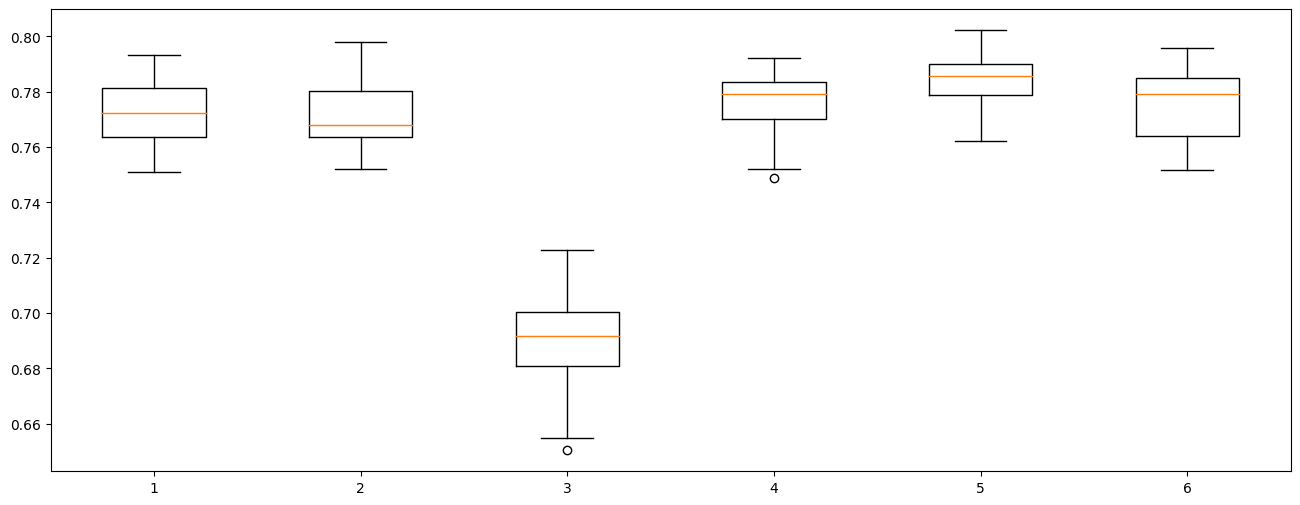

In [20]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [12]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val


0.9736417640719365

In [13]:
t_stat, p_val = stats.ttest_ind(samples[2], samples[0])
p_val

7.803068554920082e-20

In [14]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[3])
p_val

0.26772782151129026

In [15]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[4])
p_val

0.005414274305306348

In [21]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[5])
p_val

0.036464829767570144

Лучшим оптимизатором по показателям стал Adam lr = 0.001